<h1>Linear regression exercise</h1>

<h2>Imports</h2>

In [493]:
# Here is imports for the linear regression model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint, uniform
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [494]:
# Save the data into a dataframe
csv_path = "laptopData.csv"
df = pd.read_csv(csv_path)

<h3>Insights into the dataframe</h3>

In [495]:
# Display the first 5 rows of the DataFrame
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [496]:
# Display info about the columns like mean, standard deviation, min and max values
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1273.0,652.674784,376.493027,0.00,327.00,652.00,980.0000,1302.00
Price,1273.0,59955.814073,37332.251005,9270.72,31914.72,52161.12,79333.3872,324954.72


In [497]:
# Display info about the DataFrame and it's columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1273 non-null   float64
 1   Company           1273 non-null   object 
 2   TypeName          1273 non-null   object 
 3   Inches            1273 non-null   object 
 4   ScreenResolution  1273 non-null   object 
 5   Cpu               1273 non-null   object 
 6   Ram               1273 non-null   object 
 7   Memory            1273 non-null   object 
 8   Gpu               1273 non-null   object 
 9   OpSys             1273 non-null   object 
 10  Weight            1273 non-null   object 
 11  Price             1273 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


In [498]:
# Display the head of the DataFrame
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [499]:
# Drop the unnamed: 0 column since it seems to just be some type of a index column 
df = df.drop(columns="Unnamed: 0", axis=1)

In [500]:
# Display the Company value_counts to see all the different Laptop producers within DataFrame
df["Company"].value_counts()

Company
Lenovo       290
Dell         287
HP           266
Asus         156
Acer         103
MSI           53
Toshiba       47
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Vero           4
Xiaomi         4
Chuwi          3
LG             3
Google         3
Huawei         2
Fujitsu        2
Name: count, dtype: int64

In [501]:
# Display the TypeName value_counts within DataFrame
df["TypeName"].value_counts()

TypeName
Notebook              710
Gaming                203
Ultrabook             191
2 in 1 Convertible    116
Workstation            29
Netbook                24
Name: count, dtype: int64

In [502]:
# Display all the columns within DataFrame
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

<h3>Checking and dealing with for missing values</h3>

In [503]:
# Check for missing values
df.isna().sum()

Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [504]:
# Create a new DataFrame with only rows containing missing values within any columns
isna_df = df[df.isna().any(axis=1)]

# Display the rows with missing values with the new DataFrame created for them
isna_df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [505]:
# Removes rows where at least one NaN exists
df = df.dropna(axis=0)

In [506]:
# Check if there is any duplicates within the DataFrame
int(df.duplicated().sum())

# Remove duplicates within the DataFrame
df = df.drop_duplicates()

<h3>Optimizing data for basic visualization</h3>

In [507]:
# Display the Memory value counts to see all the different memory types
df['Memory'].value_counts()

Memory
256GB SSD                        401
1TB HDD                          209
500GB HDD                        121
512GB SSD                        112
128GB SSD +  1TB HDD              92
128GB SSD                         72
256GB SSD +  1TB HDD              71
32GB Flash Storage                35
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           13
64GB Flash Storage                12
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
128GB Flash Storage                4
180GB SSD                          4
16GB SSD                           3
512GB SSD +  2TB HDD               3
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
1TB SSD +  1TB HDD                 2
512GB Flash Storage                2
512GB SSD +  512GB SSD         

In [508]:
# Split Memory into two parts if there are multiple storage types
df[["Primary_Storage", "Secondary_Storage"]] = df["Memory"].str.split(" \+ ", expand=True, n=1)

In [509]:
# Display the Primary_Storage value counts to see all the different primary storage types
df['Primary_Storage'].value_counts()

Primary_Storage
256GB SSD              487
1TB HDD                210
128GB SSD              166
512GB SSD              132
500GB HDD              121
32GB Flash Storage      35
2TB HDD                 16
1TB SSD                 15
64GB Flash Storage      13
256GB Flash Storage      8
16GB Flash Storage       7
1.0TB Hybrid             7
32GB SSD                 6
128GB Flash Storage      4
180GB SSD                4
16GB SSD                 3
512GB Flash Storage      2
64GB SSD                 1
32GB HDD                 1
?                        1
128GB HDD                1
240GB SSD                1
8GB SSD                  1
508GB Hybrid             1
1.0TB HDD                1
Name: count, dtype: int64

In [510]:
# Display the row with Memory with value ?
droppable_row = df.loc[df['Memory'] == '?']
droppable_row

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Primary_Storage,Secondary_Storage
770,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16GB,?,AMD Radeon R7 M445,Windows 10,2.3kg,62938.0656,?,None


In [511]:
# Drop the row where Memory Value == ?
df = df.drop(droppable_row.index)

In [512]:
# Display the Secondary_Storage value counts to see all the different primary storage types
df['Secondary_Storage'].value_counts()

Secondary_Storage
1TB HDD         181
2TB HDD          15
256GB SSD         3
500GB HDD         2
1.0TB Hybrid      2
512GB SSD         1
Name: count, dtype: int64

In [513]:
# Display the head of the DataFrame
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Primary_Storage,Secondary_Storage
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,128GB SSD,None
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,128GB Flash Storage,None
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,256GB SSD,None
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,512GB SSD,None
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,256GB SSD,None


In [514]:
# Function to check if storage contains TB or GB and convert size accordingly
def convert_storage_to_gb(storage):
    # Check that the storage is not NaN
    if pd.notna(storage):
        # Check if the storage is in TB or GB,
        # if in TB, convert to GB by multiplying by 1024 and convert to float
        if "TB" in storage:
            size = float(storage.split("TB")[0].strip()) * 1024
            return size
        # If in GB, remove the GB and convert to float
        elif "GB" in storage:
            size = float(storage.split("GB")[0].strip())
            return size
    return 0  # Default for missing values

# Apply conversion to Primary and Secondary Storage
df["Primary_Size_inGB"] = df["Primary_Storage"].apply(convert_storage_to_gb)
df["Secondary_Size_inGB"] = df["Secondary_Storage"].apply(convert_storage_to_gb)

In [515]:
# Display the Primary_Size_inGB value counts
df['Primary_Size_inGB'].value_counts()

Primary_Size_inGB
256.0     495
1024.0    233
128.0     171
512.0     134
500.0     121
32.0       42
2048.0     16
64.0       14
16.0       10
180.0       4
240.0       1
8.0         1
508.0       1
Name: count, dtype: int64

In [516]:
# Display the Secondary_Size_inGB value counts
df['Secondary_Size_inGB'].value_counts()

Secondary_Size_inGB
0.0       1039
1024.0     183
2048.0      15
256.0        3
500.0        2
512.0        1
Name: count, dtype: int64

In [517]:
# Display the head of the DataFrame
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Primary_Storage,Secondary_Storage,Primary_Size_inGB,Secondary_Size_inGB
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,128GB SSD,None,128.0,0.0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,128GB Flash Storage,None,128.0,0.0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,256GB SSD,None,256.0,0.0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,512GB SSD,None,512.0,0.0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,256GB SSD,None,256.0,0.0


In [518]:
# Drop the Memory column since we have extracted all the needed information from it
df = df.drop(columns=['Memory'], axis=1)

# Rename the Inches column to ScreenSize
df.rename(columns={"Inches": "ScreenSize"}, inplace=True)


In [519]:
# Display the head of the DataFrame
df.head()

,Company,TypeName,ScreenSize,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price,Primary_Storage,Secondary_Storage,Primary_Size_inGB,Secondary_Size_inGB
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,128GB SSD,None,128.0,0.0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,128GB Flash Storage,None,128.0,0.0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86kg,30636.0000,256GB SSD,None,256.0,0.0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,512GB SSD,None,512.0,0.0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,256GB SSD,None,256.0,0.0


In [520]:
# Extract numeric values before converting to float
df["Weight"] = df["Weight"].str.extract(r"(\d+\.?\d*)").astype(float)
df["Ram"] = df["Ram"].str.extract(r"(\d+)").astype(float)
df["ScreenSize"] = df["ScreenSize"].str.extract(r"(\d+)").astype(float)

Basic Visualization


<Axes: >

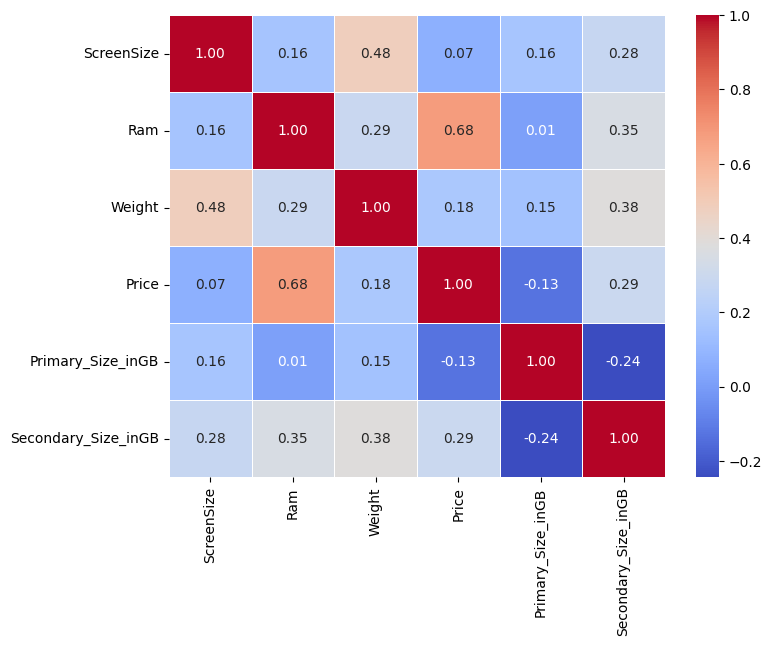

In [521]:
# Select only numeric columns
df_numeric = df.select_dtypes(include=["number"])
# Create a heatmap from the numeric columns
plt.figure(figsize=(8, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)


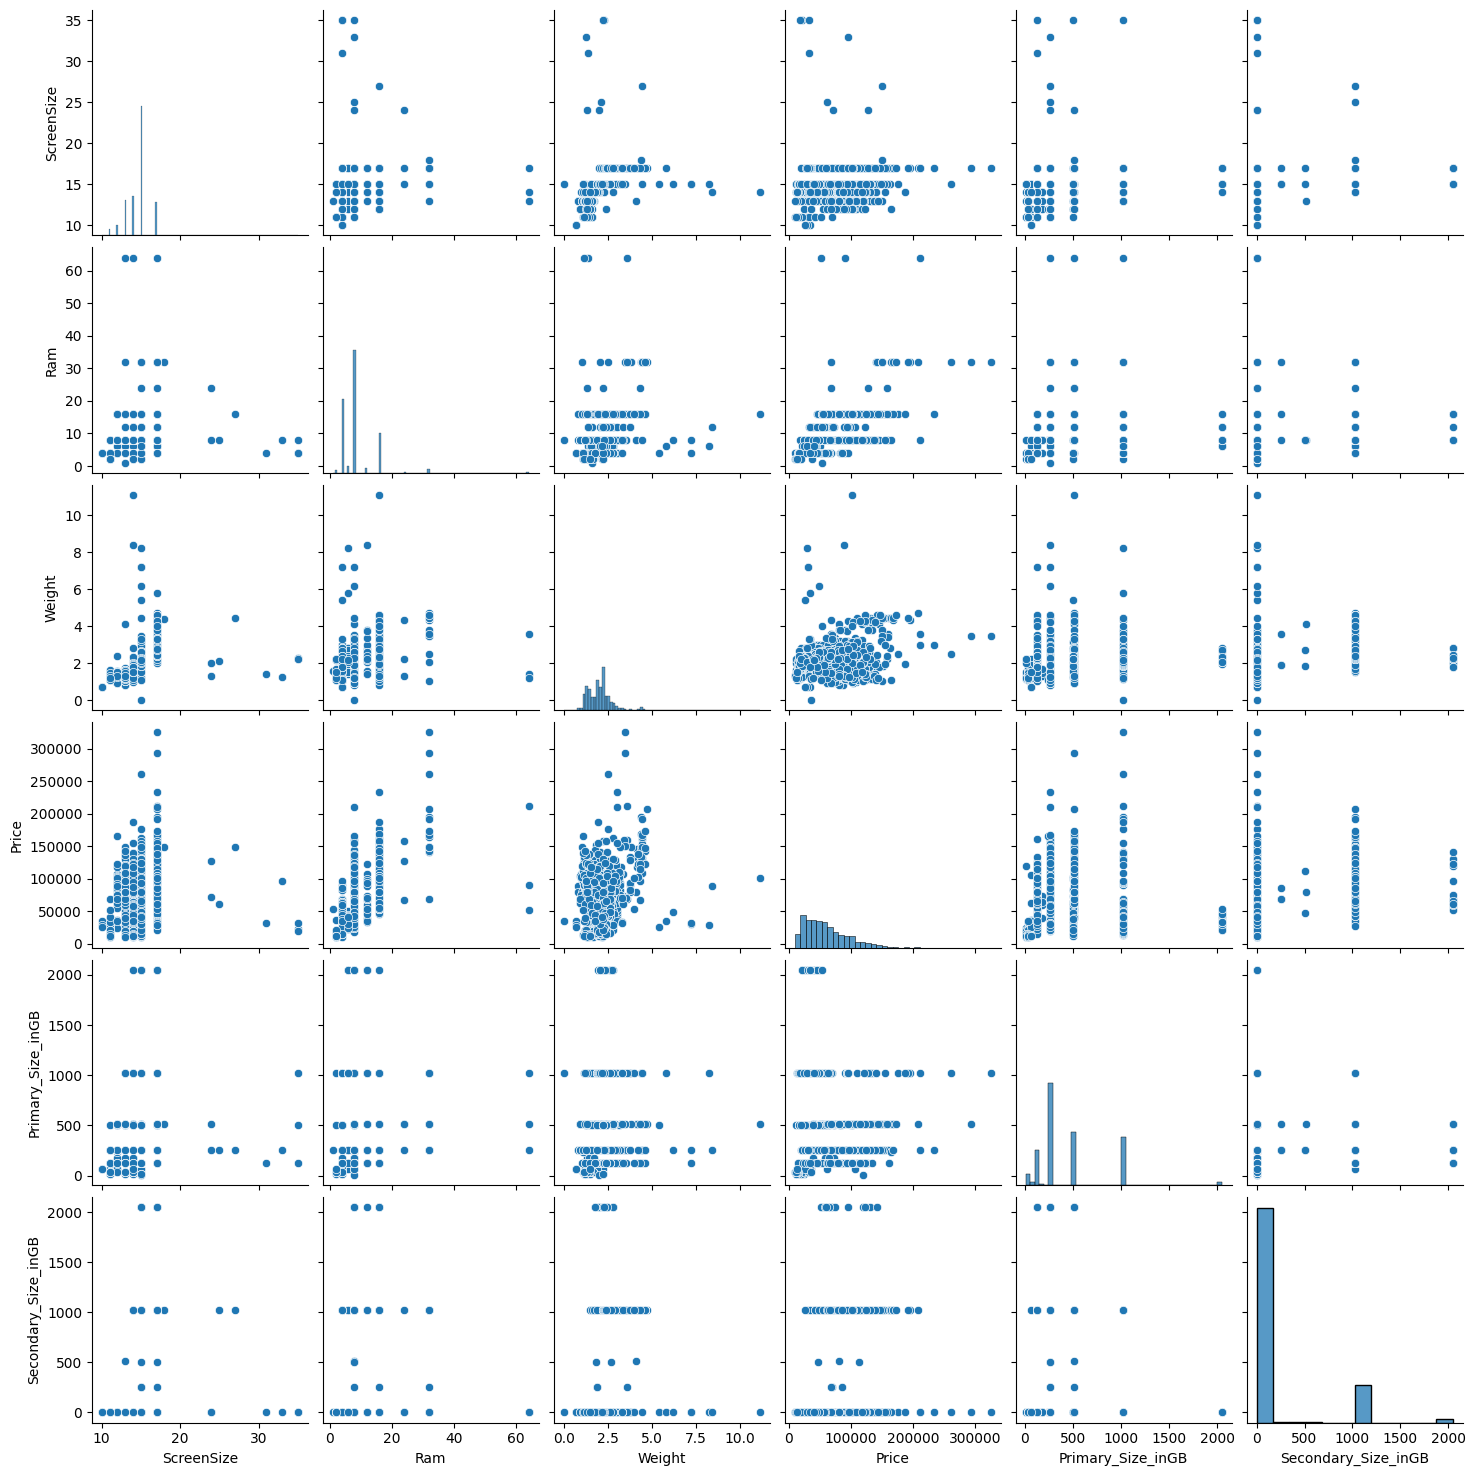

In [522]:
# pair plot to see everything at once
sns.pairplot(df_numeric)

# Nothing seems to correlate that well with price, this could be because of companies brand value or other possible factors like model name excetra

<Axes: xlabel='Price', ylabel='Count'>

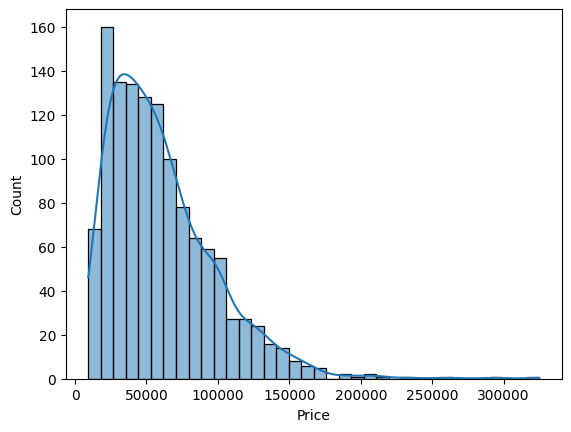

In [523]:
sns.histplot(df['Price'], kde=True)

<h1>Optimization for machine learning</h1>

In [524]:
# Display the name of the columns within DataFrame
df.columns

Index(['Company', 'TypeName', 'ScreenSize', 'ScreenResolution', 'Cpu', 'Ram',
       'Gpu', 'OpSys', 'Weight', 'Price', 'Primary_Storage',
       'Secondary_Storage', 'Primary_Size_inGB', 'Secondary_Size_inGB'],
      dtype='object')

In [525]:
# Display the head of the DataFrame
df.head()

,Company,TypeName,ScreenSize,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price,Primary_Storage,Secondary_Storage,Primary_Size_inGB,Secondary_Size_inGB
0,Apple,Ultrabook,13.0,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,128GB SSD,None,128.0,0.0
1,Apple,Ultrabook,13.0,1440x900,Intel Core i5 1.8GHz,8.0,Intel HD Graphics 6000,macOS,1.34,47895.5232,128GB Flash Storage,None,128.0,0.0
2,HP,Notebook,15.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,Intel HD Graphics 620,No OS,1.86,30636.0000,256GB SSD,None,256.0,0.0
3,Apple,Ultrabook,15.0,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,AMD Radeon Pro 455,macOS,1.83,135195.3360,512GB SSD,None,512.0,0.0
4,Apple,Ultrabook,13.0,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,256GB SSD,None,256.0,0.0


In [526]:
# df = df.drop(columns=["Company"])

In [527]:
# list of all boolean variables we want to convert
variables = ['Company',
 'TypeName',
 'ScreenResolution',
 'Cpu',
 'Gpu',
 'OpSys',
 'Primary_Storage',
 'Secondary_Storage']

# use encoder
encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot_encoded = encoder.fit_transform(df[variables]).astype(int)
df = pd.concat([df,one_hot_encoded],axis=1).drop(columns=variables)

In [528]:
# List of categorical columns to convert into binary columns
# categorical_columns = ['Company',
# 'TypeName',
# 'ScreenResolution',
# 'Cpu',
# 'Gpu',
# 'OpSys',
# 'Primary_Storage',
# 'Secondary_Storage'
# ]

# Loop through each categorical column and apply binary conversion
# for col in categorical_columns:
    # Go through each variable within df[col]
#    if col in df.columns:
#        for unique_value in df[col].unique():
#            df[unique_value] = (df[col] == unique_value).astype(int)
            # Drop the original categorical column
#        df.drop(columns=[col], inplace=True)

In [529]:
# Display the categorical columns
# categorical_columns

In [530]:
# Calculate the first 30th and 70 percentile of "Price column"
Q1 = df["Price"].quantile(0.3)
Q3 = df["Price"].quantile(0.7)
IQR = Q3 - Q1

# Define the lower and upper bound of the data to detect outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the DataFrame
df = df[(df["Price"] >= lower_bound) & (df["Price"] <= upper_bound)]

In [531]:
# Compute Z-score based on price on the dataframe
# Z-score gives better accuracy, I found out that this one was the best for this dataset
df["Z-score"] = stats.zscore(df["Price"])

# Remove outliers within the dataframe
df = df[df["Z-score"].abs() < 3]


In [532]:
# Calculate the ram amount by price
df["RAM_per_Price"] = df["Ram"] / df["Price"]

In [533]:
# Calculate Value-to-Weight Ratio
# df['Value_to_Weight'] = df['Price'] / df['Weight']

# This only increased the error so I will not use this feature

In [534]:
# Display the head of the DataFrame
df.head()

,ScreenSize,Ram,Weight,Price,Primary_Size_inGB,Secondary_Size_inGB,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,...,Primary_Storage_8GB SSD,Secondary_Storage_ 1.0TB Hybrid,Secondary_Storage_ 1TB HDD,Secondary_Storage_ 256GB SSD,Secondary_Storage_ 2TB HDD,Secondary_Storage_ 500GB HDD,Secondary_Storage_ 512GB SSD,Secondary_Storage_None,Z-score,RAM_per_Price
0,13.0,8.0,1.37,71378.6832,128.0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,1,0.614509,0.000112
1,13.0,8.0,1.34,47895.5232,128.0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,1,-0.228505,0.000167
2,15.0,8.0,1.86,30636.0000,256.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1,-0.848099,0.000261
4,13.0,8.0,1.37,96095.8080,256.0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,1,1.501822,0.000083
5,15.0,4.0,2.10,21312.0000,500.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,1,-1.182818,0.000188


In [535]:
# Remove special characters from column names
# otherwise XGBRegressor will give an error
df.columns = df.columns.str.replace(r'[\[\]<>]', '', regex=True)  

In [536]:
# Removes rows where at least one NaN exists, NaN was removed earlier also, but one row was missed
# This was found out by error code
df = df.dropna(axis=0)

In [537]:
# Create variable x and y, drop the Price column from X and set Y to Price
# Use X as training data and Y as the target variable
X = df.drop(columns=["Price"], axis=1)
y = df["Price"]

In [538]:
# Split the dataset into training and testing data, X = 70% training data, y = 30% testing data, X, y, test_size=0.2, random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [539]:
# xgb = XGBRegressor(random_state=ord("S"))


# param_dist_xgb = {
#    'n_estimators': randint(100, 2000),  
#    'learning_rate': uniform(0.01, 0.3), 
#    'max_depth': randint(3, 15),          
#    'subsample': uniform(0.5, 0.5),       
#    'colsample_bytree': uniform(0.5, 0.5),
#    'gamma': uniform(0, 1),               
#    'reg_alpha': uniform(0, 1),          
#    'reg_lambda': uniform(0, 1)          
# }


# xgb_random = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist_xgb, n_iter=100, cv=3, verbose=1, random_state=42, n_jobs=-1)
# xgb_random.fit(X_train, y_train)

In [540]:
# Create function to evaluate model
# def evaluate_model(model, X, y):
   # y_pred = model.predict(X)
   # mae = mean_absolute_error(y, y_pred)
   # mse = mean_squared_error(y, y_pred) 
  #  rmse = mse ** 0.5
    # r2 = r2_score(y, y_pred)
   # return mae, mse, rmse, r2

# Evaluate XGBoost Model
# xgb_train_mae, xgb_train_mse, xgb_train_rmse, xgb_train_r2 = evaluate_model(xgb_random.best_estimator_, X_train, y_train)
# xgb_test_mae, xgb_test_mse, xgb_test_rmse, xgb_test_r2 = evaluate_model(xgb_random.best_estimator_, X_test, y_test)

# Create a results DataFrame to compare all models
# results = pd.DataFrame({
   # 'Best Hyperparameters for this model in theory': [
   #     xgb_random.best_params_
   # ],
   # 'Train MAE': xgb_train_mae,
   # 'Test MAE': xgb_test_mae,
   # 'Train MSE': xgb_train_mse,
   # 'Test MSE': xgb_test_mse,
   # 'Train RMSE': xgb_train_rmse,
   # 'Test RMSE': xgb_test_rmse,
   # 'Train R²': xgb_train_r2,
    #'Test R²': xgb_test_r2
# })

# Display the results
# results

Wanted to try what this other Kaggle user did. Link: https://www.kaggle.com/code/abdocan/laptop-price-predictor-91-0-216-mae-0-292-rmse#Best-performing-models-based-on-multiple-metrics-(MAE,-RMSE,-and-R²):
Seems like it's better to go with my owm code

In [541]:
# Find the best hyperparameters for the model 

# param_grid = {
#    'max_depth': [3, 5, 7],
#    'reg_alpha': [0, 0.1, 1],
#    'reg_lambda': [0.5, 1, 2],
#    'learning_rate': [0.1, 0.2, 0.3],
#}

# xgb = XGBRegressor()
# grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)

# print("Best parameters:", grid_search.best_params_)

If you want to try find better values, uncomment the section above

In [542]:
df

,ScreenSize,Ram,Weight,Price,Primary_Size_inGB,Secondary_Size_inGB,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,...,Primary_Storage_8GB SSD,Secondary_Storage_ 1.0TB Hybrid,Secondary_Storage_ 1TB HDD,Secondary_Storage_ 256GB SSD,Secondary_Storage_ 2TB HDD,Secondary_Storage_ 500GB HDD,Secondary_Storage_ 512GB SSD,Secondary_Storage_None,Z-score,RAM_per_Price
0,13.0,8.0,1.37,71378.6832,128.0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,1,0.614509,0.000112
1,13.0,8.0,1.34,47895.5232,128.0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,1,-0.228505,0.000167
2,15.0,8.0,1.86,30636.0000,256.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1,-0.848099,0.000261
4,13.0,8.0,1.37,96095.8080,256.0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,1,1.501822,0.000083
5,15.0,4.0,2.10,21312.0000,500.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,1,-1.182818,0.000188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,15.0,4.0,2.20,38378.6496,500.0,0.0,0,0,1,0,...,0,0,0,0,0,0,0,1,-0.570148,0.000104
1270,14.0,4.0,1.80,33992.6400,128.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1,-0.727600,0.000118
1271,13.0,16.0,1.30,79866.7200,512.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.919219,0.000200
1272,14.0,2.0,1.50,12201.1200,64.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1,-1.509887,0.000164


In [543]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [544]:
# Train XGBRegressor
# model = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, reg_alpha=1, reg_lambda=1, random_state=42)
# model.fit(X_train, y_train)

<h3>Error & Performance Metrics</h3>

In [545]:
# Create variable for predictions from variable x_test
predictions = model.predict(X_test)

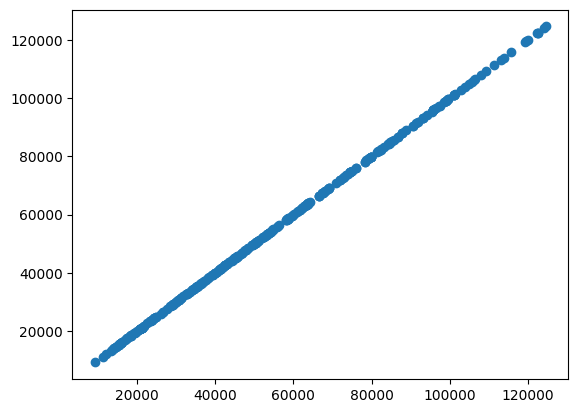

In [546]:
# Create a scatter plot to compare the actual price and predicted price
plt.scatter(y_test, predictions)
plt.show()

In [547]:
# Create and print MAE - Mean average error, to see the average error between actual and predicted price
print("MAE")
print(round(metrics.mean_absolute_error(y_test, predictions), 2), "$")

# Create and print MSE - Mean square error, to see the average squared difference between actual and predicted price
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, predictions), 2), "$^2")

# Create and print RMSE - Root mean square error, to see the MSE squared (to see the error in the original unit of the target variable)
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, predictions)), 2), "$")

# R-squared. 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
# Create R2_score to see how well the model describes the dataset
print('\nR-squared:')
print(round(metrics.r2_score(y_test, predictions), 5))

MAE
0.0 $

MSE
0.0 $^2

RMSE:
0.0 $

R-squared:
1.0


This seems a bit unrealistic, but before adding Z-Score it seemed more realistical this needs to be checked
The version before Z-Score will also be added to git.

In [548]:
# Display the max price within DataFrame
print(f"{df['Price'].max()}$")

124621.92$


MAE seems to be relatively low, it could be better but the model and dataset are quite hard to be optimized any further. MSE seems unbeliviably high. This needs to be checked.

In [549]:
# Compute MAE as percentage of the average price to see how relative MAE is to the overall scale of the data
mae_percentage = metrics.mean_absolute_error(y_test, predictions) / df["Price"].mean()
mae_percentage = round(mae_percentage, 4) * 100

# Display the MAE difference % towards the average price
print(f"MAE difference in % towards average: {mae_percentage} %")

# Compute MSE as a percentage of the mean price
mse_percentage = metrics.mean_squared_error(y_test, predictions) / df["Price"].mean()  
mse_percentage = round(mse_percentage, 2) * 100  

# Display the MSE difference % towards the average price
print(f"MSE difference in % towards average: {mse_percentage} %^2")

# Compute RMSE as a percentage of the average price to see how relative RMSE is to the overall scale of the data
rmse_percentage = np.sqrt(metrics.mean_squared_error(y_test, predictions)) / df["Price"].mean()
rmse_percentage = round(rmse_percentage, 4) * 100

# Display the RMSE difference % towards the average price
print(f"RMSE difference in % towards average: {rmse_percentage} %")

MAE difference in % towards average: 0.0 %
MSE difference in % towards average: 0.0 %^2
RMSE difference in % towards average: 0.0 %


MSE might be off because off the high average price, meaning there are more higher end laptops within the dataset. This should explain procentually low MAE and RMSE values.

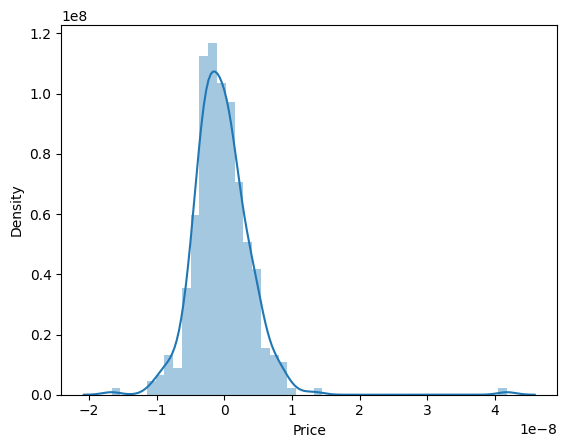

In [550]:
# Create distplot to see the distribution of the difference between actual and predicted price
sns.distplot((y_test - predictions))
plt.show()

This model seems quite accurate, could be either really precise or does not really work within real-world

In [551]:
# Find the residuals between the actual and predicted price
residuals = (y_test - predictions)

# Compute Q1 (25th percentile) and Q3 (75th percentile) of residuals
Q1 = residuals.quantile(0.2)
Q3 = residuals.quantile(0.70)

# Compute IQR (Interquartile Range)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers and their corresponding actual values
outliers = residuals[(residuals < lower_bound) | (residuals > upper_bound)]

# Get the index of the outliers to compare the predicted and actual values
outlier_indices = outliers.index  
# Get the actual price value of the outliers to compare with the predicted price
actual_values = y_test.loc[outlier_indices]  

# Compute percentage of an error for each outlier
outlier_percentage = (outliers / actual_values) * 100

# Display outliers and their percentage error
print(pd.DataFrame({ 
    "Actual Price": actual_values,
    "Extreme Errors (Outliers)": outliers,
    "Outlier % of the Actual Price": round(outlier_percentage, 2)
}))



      Actual Price  Extreme Errors (Outliers)  Outlier % of the Actual Price
1265    47898.7200               1.055741e-08                            0.0
1151    15824.1600               8.654752e-09                            0.0
605    122490.7200              -1.085573e-08                           -0.0
408     21791.5200              -1.029912e-08                           -0.0
504     14119.2000               8.334609e-09                            0.0
630    101232.0000               4.176400e-08                            0.0
718     14119.2000              -1.668013e-08                           -0.0
1266    29303.4672               1.335138e-08                            0.0
279     45234.7200               8.389179e-09                            0.0
570     99153.5472               8.905772e-09                            0.0


Seems like procentually, the model is not noticably procentually off that often except few times. But it is noticably off in price, but if you can afford to buy this pricy computers, it shouldn't be that much for you. This does not include outliers that are off over 2 procent especially outlier index 1215, which has -14.27% prediction. Taking into account that you either earn a really significant amount or these are big companies.

In [552]:
# Create variable tester row to test the model with a random row from the DataFrame
tester_row = df.sample(n=1)

# Display the tester row's index
print(f"Index: {tester_row.index[0]}")

# Display the index row
print(pd.DataFrame(tester_row))


Index: 1073
      ScreenSize  Ram  Weight    Price  Primary_Size_inGB  \
1073        13.0  8.0    1.49  58075.2              256.0   

      Secondary_Size_inGB  Company_Acer  Company_Apple  Company_Asus  \
1073                  0.0             0              0             0   

      Company_Chuwi  ...  Primary_Storage_8GB SSD  \
1073              0  ...                        0   

      Secondary_Storage_ 1.0TB Hybrid  Secondary_Storage_ 1TB HDD  \
1073                                0                           0   

      Secondary_Storage_ 256GB SSD  Secondary_Storage_ 2TB HDD  \
1073                             0                           0   

      Secondary_Storage_ 500GB HDD  Secondary_Storage_ 512GB SSD  \
1073                             0                             0   

      Secondary_Storage_None   Z-score  RAM_per_Price  
1073                       1  0.136932       0.000138  

[1 rows x 341 columns]


In [553]:
# Drop the Price column from the tester row
X_tester_row = tester_row.drop(columns=["Price"])
y_tester_row = tester_row["Price"]


In [554]:
# Use the model to predict the price of the tester row
y_tester_prediction = model.predict(X_tester_row)

In [555]:
# Store the result of the prediction in a vriable
result = y_tester_prediction[0]

# Display the actual price of the tester row
print(f"The actual price: {y_tester_row.values[0]}$")

# Display the predicted price (rounded to 2 decimal places)
print(f"The predicted price: {round(float(result), 2)}$")

The actual price: 58075.2$
The predicted price: 58075.2$


In [556]:
# Calculate the precision of the model
precision = result / y_tester_row.values[0]
    
# Convert to percentage
precision_percentage = round(precision * 100, 2)

if precision_percentage > 100:
    overestimate_percentage = round(100 - precision_percentage, 2)
    print(f"Models prediction too high and was off by {overestimate_percentage}%.")
elif precision_percentage < 100:
        underestimate_percentage = round(precision_percentage - 100, 2)
        print(f"Models prediction was too low and was off by {underestimate_percentage}%.")


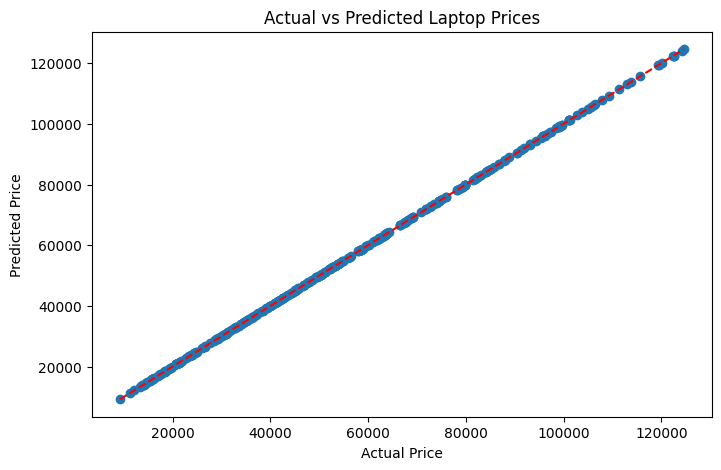

In [557]:
# Visualize the Linear Regression line with the actual and predicted price
plt.figure(figsize=(8,5))
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle="--")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Laptop Prices")
plt.show()

This seems to go quite linearly, not any significant predictions this scatterplot. But the 1215 row is missing since there we could see the significant change in actual price and prediction.

The model seems to predict quite accurately with small procentual error.